# A.) Adatvizualizáció és klaszterezés

### A1.) Az adathalmaz megismerése, a benne szereplő attribútumok bemutatása és általános jellemzése

A szükséges csomagok importálása és az adattábla olvasása

In [39]:
import pandas as pd
import numpy as np

In [40]:
df = pd.read_csv('data_24.csv')
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


A könnyebb átláthatóság kedvéért és az adatok értelmezéséhez átnevezem az oszlopokat, lentebb pedig az egyes adatok típusát és értékét is megváltoztatom.

In [41]:
df.rename(columns={"1": "age",
                   "2": "sex",
                   "3": "chest pain type",
                   "4": "resting blood pressure",
                   "5": "serum cholestoral in mg/dl",
                   "6": "fasting blood sugar > 120 mg/dl",
                   "7": "resting electrocardiographic results",
                   "8": "maximum heart rate achieved",
                   "9": "exercise induced angina",
                   "10": "oldpeak",
                   "11": "the slope of the peak exercise ST segment",
                   "12": "number of major vessels colored by flourosopy",
                   "13": "thal",
                   "14": "heart disease"}, inplace=True)
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [42]:
df_num=df.copy()

###### age: kor
###### sex: nem
###### chest pain type: mellkasi fájdalom típusa (4 féle)
###### resting blood pressure: nyugalmi vérnyomás
###### serum cholestoral in mg/dl: vérplazmában lévő koleszterin szint mg/dl
###### fasting blood sugar > 120 mg/dl: éhgyomori vércukorszint nagyobb-e, mint 120 mg/dl
###### resting electrocardiographic results: nyugalmi ekg
###### maximum heart rate achieved: max szívverés
###### exercise induced angina: terheléses mellkasi fájdalom/diszkomfort érzés
###### oldpeak = ST depression induced by exercise relative to rest: terhelés általi csökkenése az ST-nek a nyugalmi állapothoz képest
###### the slope of the peak exercise ST segment: ST szakasz meredeksége
###### number of major vessels colored by flourosopy: színezett főerek száma (fluoreszcens festékkel festett véreres vizsgalat)
###### thal:  Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. OR A thallium stress test is a nuclear medicine study that shows your physician how well blood flows through your heart muscle while you're exercising or at rest.
###### heart disease: van-e szívbetegsége

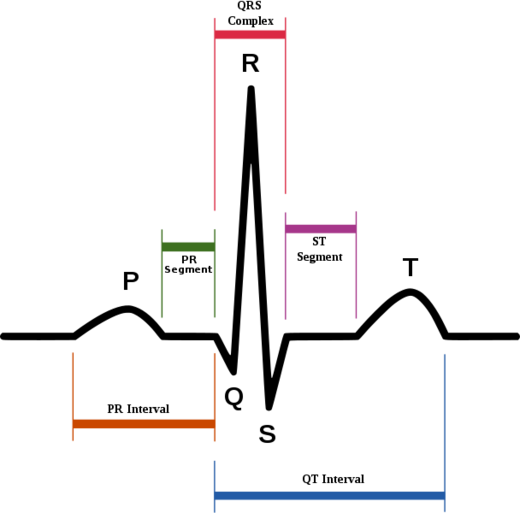

#### A P és Q szakasz az ingerület átvezetési idejét jelöli a pitvarokról a kamrákra, normál időtartama 0,04-0,1 másodperc.
#### Az ún. QRS-komplexum a kamra összehúzódását jelzi, a Q ponton a kamra ernyedt állapotban van, az R ponton a kamra izomzata ingerületbe kerül, míg az S ponton a kamra ingerülete (összehúzódása) alapállapotba rendeződik. Normál időtartama 0,06-0,1 másodperc, azonban nem árt tudni, hogy a jobb és bal kamra nyugalomba kerülése (depolarizációja) eltérő hosszúságú, ez az izomtömeg különbségével hozható összefüggésbe.
#### Az ST-szakasz a kamrák ionegyensúlyának rendeződését jelöli, míg a T pont a kamra teljes egyensúlyi állapotát jelzi, ez kb. 0,2 másodperc.

###### https://hirmagazin.sulinet.hu/hu/eletmod/mit-mutat-meg-az-ekg

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            270 non-null    float64
 1   sex                                            270 non-null    float64
 2   chest pain type                                270 non-null    float64
 3   resting blood pressure                         270 non-null    float64
 4   serum cholestoral in mg/dl                     270 non-null    float64
 5   fasting blood sugar > 120 mg/dl                270 non-null    float64
 6   resting electrocardiographic results           270 non-null    float64
 7   maximum heart rate achieved                    270 non-null    float64
 8   exercise induced angina                        270 non-null    float64
 9   oldpeak                                        270 non

In [44]:
l=['sex','fasting blood sugar > 120 mg/dl','heart disease','thal','exercise induced angina']
for i in l:
    df[i] = df[i].astype(object)
    
df['sex'].replace(to_replace=True, value='male', inplace=True)
df['sex'].replace(to_replace=False, value='female', inplace=True)
df['thal'].replace(to_replace=3, value='normal', inplace=True)
df['thal'].replace(to_replace=6, value='fixed defect', inplace=True)
df['thal'].replace(to_replace=7, value='reversable defect', inplace=True)
df['heart disease'].replace(to_replace=1, value='absence', inplace=True)
df['heart disease'].replace(to_replace=2, value='presence', inplace=True)
df['fasting blood sugar > 120 mg/dl'] = df['fasting blood sugar > 120 mg/dl'].astype(bool)
df['exercise induced angina'] = df['exercise induced angina'].astype(bool)
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,70.0,male,4.0,130.0,322.0,False,2.0,109.0,False,2.4,2.0,3.0,normal,presence
1,67.0,female,3.0,115.0,564.0,False,2.0,160.0,False,1.6,2.0,0.0,reversable defect,absence
2,57.0,male,2.0,124.0,261.0,False,0.0,141.0,False,0.3,1.0,0.0,reversable defect,presence
3,64.0,male,4.0,128.0,263.0,False,0.0,105.0,True,0.2,2.0,1.0,reversable defect,absence
4,74.0,female,2.0,120.0,269.0,False,2.0,121.0,True,0.2,1.0,1.0,normal,absence


In [45]:
df.shape

(270, 14)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            270 non-null    float64
 1   sex                                            270 non-null    object 
 2   chest pain type                                270 non-null    float64
 3   resting blood pressure                         270 non-null    float64
 4   serum cholestoral in mg/dl                     270 non-null    float64
 5   fasting blood sugar > 120 mg/dl                270 non-null    bool   
 6   resting electrocardiographic results           270 non-null    float64
 7   maximum heart rate achieved                    270 non-null    float64
 8   exercise induced angina                        270 non-null    bool   
 9   oldpeak                                        270 non

In [47]:
df.describe()

,age,chest pain type,resting blood pressure,serum cholestoral in mg/dl,resting electrocardiographic results,maximum heart rate achieved,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000
mean,54.433333,3.174074,131.344444,249.659259,1.022222,149.677778,1.05000,1.585185,0.670370
std,9.109067,0.950090,17.861608,51.686237,0.997891,23.165717,1.14521,0.614390,0.943896
min,29.000000,1.000000,94.000000,126.000000,0.000000,71.000000,0.00000,1.000000,0.000000
25%,48.000000,3.000000,120.000000,213.000000,0.000000,133.000000,0.00000,1.000000,0.000000
50%,55.000000,3.000000,130.000000,245.000000,2.000000,153.500000,0.80000,2.000000,0.000000
75%,61.000000,4.000000,140.000000,280.000000,2.000000,166.000000,1.60000,2.000000,1.000000
max,77.000000,4.000000,200.000000,564.000000,2.000000,202.000000,6.20000,3.000000,3.000000


In [48]:
import warnings
warnings.filterwarnings('ignore')

### A2.) Előfeldolgozás, adattisztítás, pl. hiányzó adatok vagy extrém értékek feltérképezése, illetve kezelése, adatkonverzió

In [49]:
import matplotlib as plt

Nincs Null érték az adattáblában.

In [50]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age                                              0
sex                                              0
chest pain type                                  0
resting blood pressure                           0
serum cholestoral in mg/dl                       0
fasting blood sugar > 120 mg/dl                  0
resting electrocardiographic results             0
maximum heart rate achieved                      0
exercise induced angina                          0
oldpeak                                          0
the slope of the peak exercise ST segment        0
number of major vessels colored by flourosopy    0
thal                                             0
heart disease                                    0
dtype: int64

Beleraktam egy listába a nem object típusú folytonos attribútumokat. Dobozábrával vizsgáltam meg, hogy vannak-e kiugró értékek.

age                               AxesSubplot(0.125,0.536818;0.227941x0.343182)
resting blood pressure         AxesSubplot(0.398529,0.536818;0.227941x0.343182)
serum cholestoral in mg/dl     AxesSubplot(0.672059,0.536818;0.227941x0.343182)
maximum heart rate achieved          AxesSubplot(0.125,0.125;0.227941x0.343182)
oldpeak                           AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

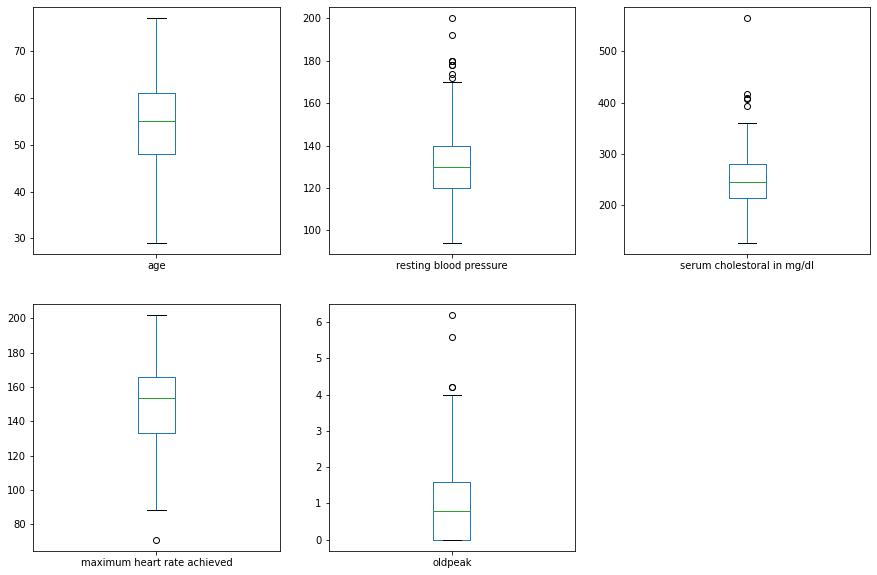

In [51]:

features = ['age', 'resting blood pressure','serum cholestoral in mg/dl',
            'maximum heart rate achieved','oldpeak']
df[features].plot.box(subplots=True, sharex=False, layout=(2,3),figsize=(15,10))

Jól látható, hogy csak 4 helyen szerepelnek kiugró értékek, extrémek pedig sehol. Ha a kiugró értékek eltávolítása mellett döntünk, akkor az alábbi módon járok el:

In [52]:
tempdf = df.copy(deep=True)

In [53]:
features = ['resting blood pressure','serum cholestoral in mg/dl',
            'maximum heart rate achieved','oldpeak']

Az alábbi két ciklus a felső és alsó határok kiszámítása után törli a kiugró értékeket tartalmazó sorokat.

In [54]:

for i in features:
    Q1=tempdf[i].quantile(0.25)
    Q3=tempdf[i].quantile(0.75)
    IQR=Q3-Q1
    mi = Q1- 1.5*IQR
    ma = Q3+ 1.5*IQR
        
    
    for j in tempdf[i]:
         if(j<mi or j>ma):
            tempdf.drop(tempdf[(tempdf[i]==j)].index, inplace= True)
        
        


resting blood pressure            AxesSubplot(0.125,0.536818;0.352273x0.343182)
serum cholestoral in mg/dl     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
maximum heart rate achieved          AxesSubplot(0.125,0.125;0.352273x0.343182)
oldpeak                           AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

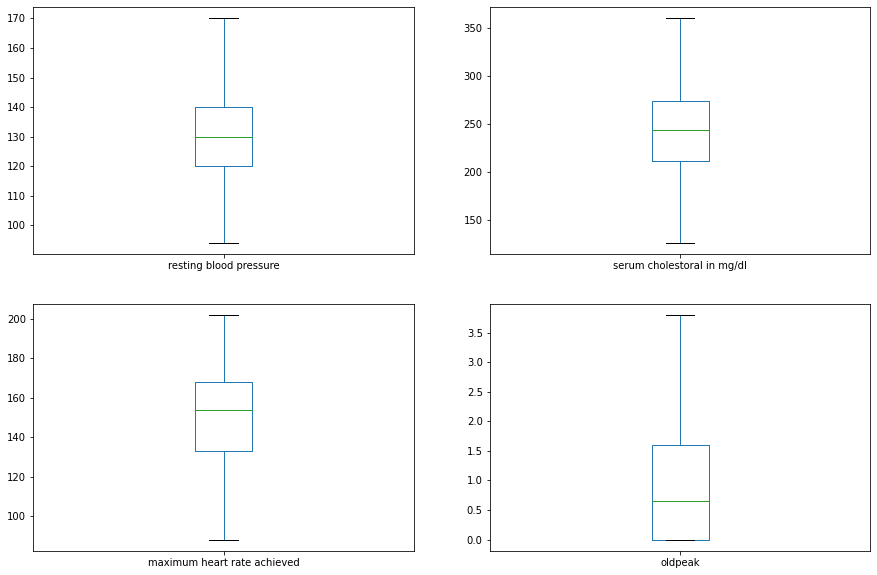

In [55]:
tempdf[features].plot.box(subplots=True, sharex=False, layout=(2,2),figsize=(15,10))

In [56]:
df.shape

(270, 14)

In [57]:
tempdf.shape

(252, 14)

In [58]:
tempdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   age                                            252 non-null    float64
 1   sex                                            252 non-null    object 
 2   chest pain type                                252 non-null    float64
 3   resting blood pressure                         252 non-null    float64
 4   serum cholestoral in mg/dl                     252 non-null    float64
 5   fasting blood sugar > 120 mg/dl                252 non-null    bool   
 6   resting electrocardiographic results           252 non-null    float64
 7   maximum heart rate achieved                    252 non-null    float64
 8   exercise induced angina                        252 non-null    bool   
 9   oldpeak                                        252 non

Így 18 sor került törlésre. Úgy döntöttem megtartom a kiugró értékeket a továbbiakban.

### A3.) Különböző vizualizációs eszközök használata

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'resting blood pressure'}>,
        <AxesSubplot:title={'center':'serum cholestoral in mg/dl'}>,
        <AxesSubplot:title={'center':'maximum heart rate achieved'}>,
        <AxesSubplot:title={'center':'oldpeak'}>, <AxesSubplot:>]],
      dtype=object)

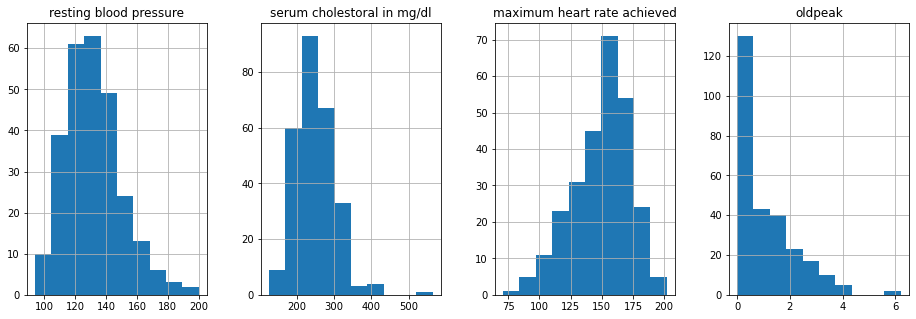

In [60]:
df[features].hist(layout=(1,5),figsize=(20,5))

Kíváncsi voltam az előbb vizsgált attribútumok értékeinek megoszlására igy hisztogramban ábrázoltam őket.

In [61]:
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,70.0,male,4.0,130.0,322.0,False,2.0,109.0,False,2.4,2.0,3.0,normal,presence
1,67.0,female,3.0,115.0,564.0,False,2.0,160.0,False,1.6,2.0,0.0,reversable defect,absence
2,57.0,male,2.0,124.0,261.0,False,0.0,141.0,False,0.3,1.0,0.0,reversable defect,presence
3,64.0,male,4.0,128.0,263.0,False,0.0,105.0,True,0.2,2.0,1.0,reversable defect,absence
4,74.0,female,2.0,120.0,269.0,False,2.0,121.0,True,0.2,1.0,1.0,normal,absence


A továbbiakban a szívbetegek számának alakulását vizsgálom. Kezdetben ehhez egy violin plot-ot használtam a szívbetegek és nem szívbetegek arányát ábrázolva nem és kor alapján. Ez az ábra is szemlélteti az egyes adatok eloszlását.
Látható, hogy a nőknek jellemzően 50 év felett van szívbetegségük. A férfiaknál már 35-40 év felett is kimutatható valamilyen szívbetegség. Fontos azonban megjegyezni, hogy több férfi szerepel az adattáblában, mint nő és ez félrevezető lehet.

In [62]:
df['sex'].value_counts()

male      183
female     87
Name: sex, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='age'>

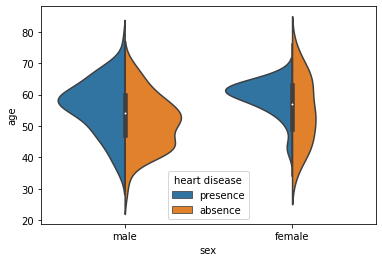

In [63]:
sns.violinplot(data=df,hue='heart disease', y='age',x='sex',split=True)

A nemek arányának nagy különbsége miatt, a továbbiakban már csak együtt vizsgálom őket.

<AxesSubplot:xlabel='age', ylabel='count'>

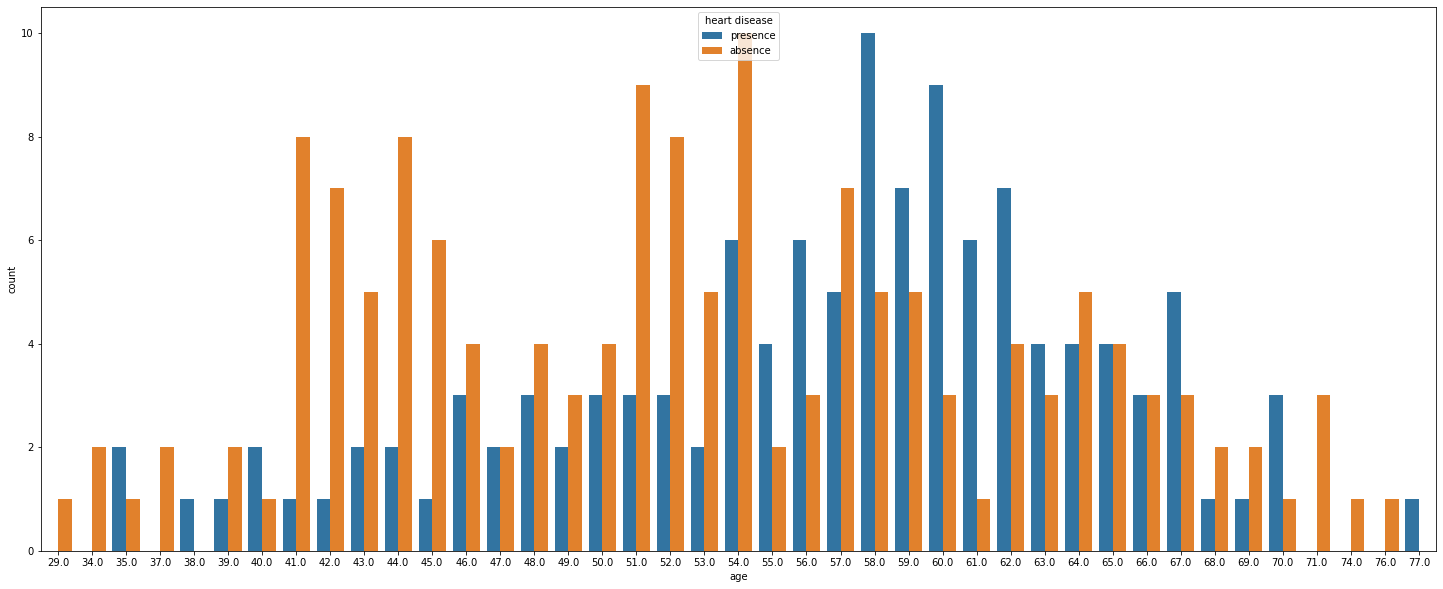

In [64]:
fig, ax = plt.subplots(figsize=(25,10))
sns.countplot(data=df, x='age',hue='heart disease',ax=ax)

Ez a countplot ábra felfogható két hisztogram egyesítettjeként. Azt tudjuk leolvasni, hogy a szívbetegek száma a korral növekszik, azonban 58 év után már
csak csökken. Ez betudható az elhalálozásoknak, a gyógyulásoknak, vagy csak a mintánk ilyen.

<AxesSubplot:xlabel='serum cholestoral in mg/dl', ylabel='maximum heart rate achieved'>

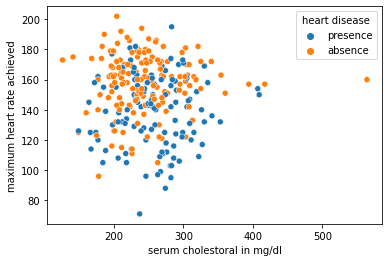

In [65]:
sns.scatterplot(data=df,x='serum cholestoral in mg/dl',y='maximum heart rate achieved', hue='heart disease')

Scatterplot x tengelyen a koleszterin szinttel, y tengelyen a max elért pulzussal. Nem feltételezek az ábra alapján összefüggést a kettő között, azonban látható, hogy a magasabb pulzussal rendelkező egyéneknél gyakrabban fordul elő szívbetegség.

<AxesSubplot:xlabel='age', ylabel='maximum heart rate achieved'>

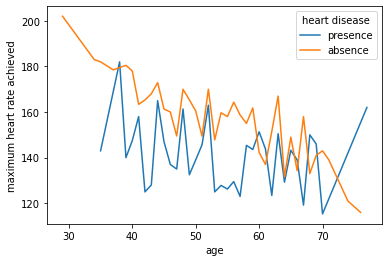

In [66]:
sns.lineplot(data=df, x='age',y='maximum heart rate achieved',estimator='mean',ci=None, hue='heart disease')

Végül még egy vonaldiagramon ábrázoltam a max pulzus és a kor alapján a betegséggel rendelkező illetve nem rendelkező egyéneket.
Az előző diagramok után ez már nem mutat újat azon kívül, hogy a kor előrehaladtával csökken a pulzusszám.

In [67]:
df.head()


,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,70.0,male,4.0,130.0,322.0,False,2.0,109.0,False,2.4,2.0,3.0,normal,presence
1,67.0,female,3.0,115.0,564.0,False,2.0,160.0,False,1.6,2.0,0.0,reversable defect,absence
2,57.0,male,2.0,124.0,261.0,False,0.0,141.0,False,0.3,1.0,0.0,reversable defect,presence
3,64.0,male,4.0,128.0,263.0,False,0.0,105.0,True,0.2,2.0,1.0,reversable defect,absence
4,74.0,female,2.0,120.0,269.0,False,2.0,121.0,True,0.2,1.0,1.0,normal,absence


In [68]:
corr=df.corr()
corr;

<AxesSubplot:>

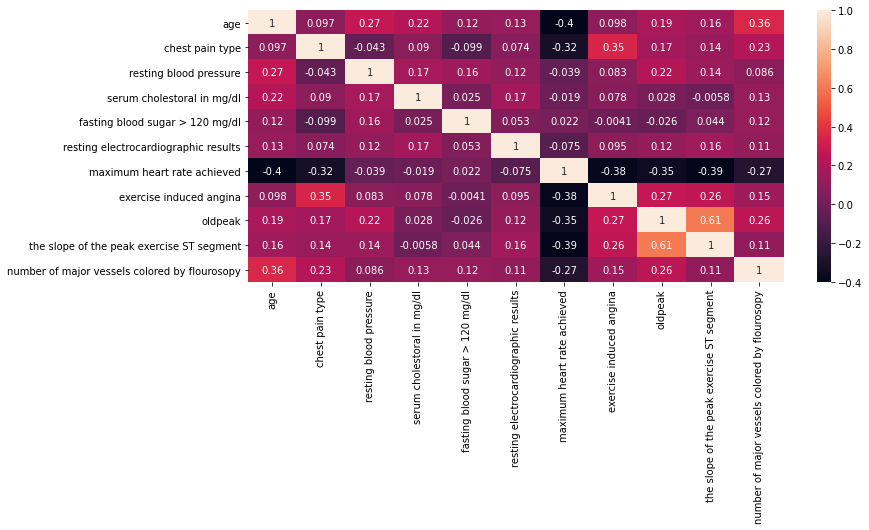

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(corr,annot=True,ax=ax)


Korrelációs mátrix és heatmap az adattábla attribútumaiból.
A heatmapban szereplő [i][j] szerinti metszet megmutatja ezen korrelációs értékek erősségét. 
Minél nagyobb ez az érték, annál világosabb és erősebb a kapcsolat köztük.
Ha 0-hoz közelít, akkor gyenge, vagy nincs kapcsolat közöttük.
Ha pedig minél kisebb, mint nulla, annál sötétebb a színe, és fordított arányosságú kapcsolatról beszélünk.

### A4.) Két különböző, klaszterezésre használható algoritmus kiválasztása, rövid bemutatása, illetve azoknak az adathalmazra történő alkalmazása, a kapott eredmények értelmezése

In [70]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

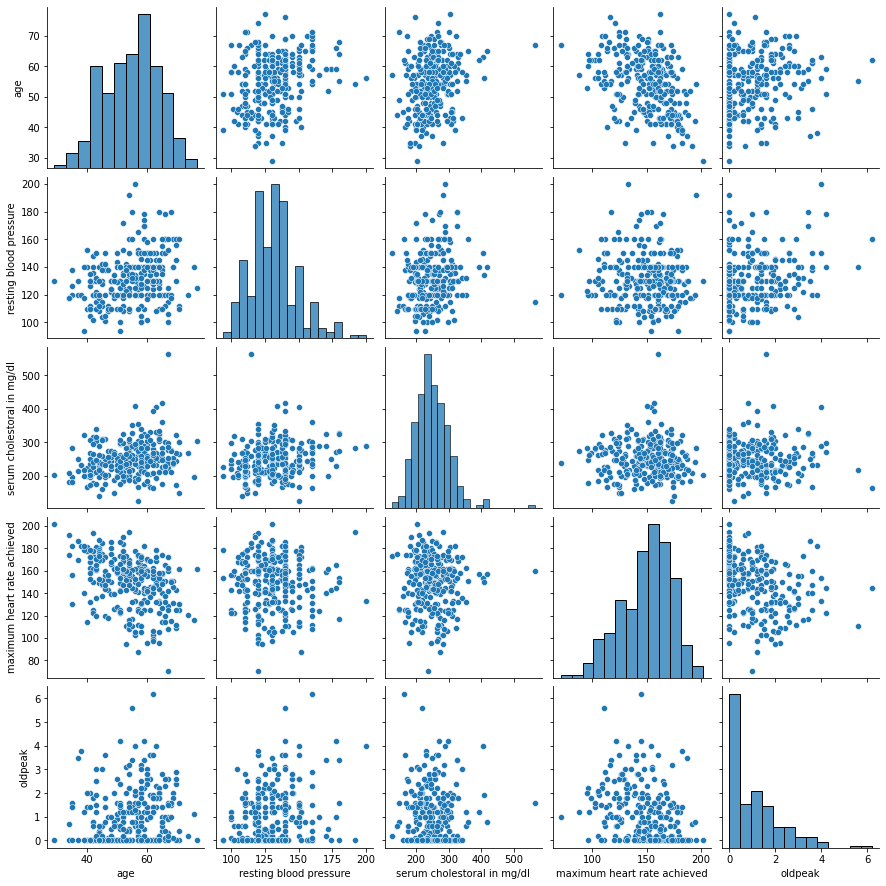

In [71]:
features = ['age', 'resting blood pressure','serum cholestoral in mg/dl',
            'maximum heart rate achieved','oldpeak']
sns.pairplot(data=df[features]);

Scatterplot mátrix a könnyebb választás érdekében a klaszterezési eljáráshoz.

### 1. k-közép módszer

Ez egy prototípus-alapú, felosztó
klaszterező módszer, amely megpróbálja
megkeresni a felhasználó által megadott számú (k)
klasztert, amelyeket a középpontjaik képviselnek.

Kizáró klaszterezés: mindegyik objektumot csak
egyetlen klaszterhez rendeli hozzá.

In [72]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df[['age','resting blood pressure']]);

In [73]:
kmeans.cluster_centers_

array([[ 54.47580645, 134.00806452],
       [ 51.76530612, 114.03061224],
       [ 59.77083333, 159.8125    ]])

In [74]:
def plot_result(kmeans,x1,x2):
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[x1], y=df[x2], hue=kmeans.labels_, palette="Set1", marker='+');
    sns.scatterplot(x=kmeans.cluster_centers_[:,0], y=kmeans.cluster_centers_[:,1], marker='o', s=100, c=['black']);

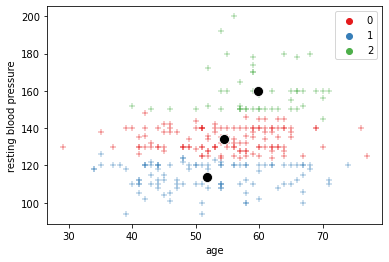

In [75]:
plot_result(kmeans,'age','resting blood pressure')

Mivel a scatterplot mátrixban nem kaptam nagyjából már csoportokba rendeződött pontokat, 
ezért választottam az age és resting blood pressure attribútumokat, mivel több vérnyomáshoz tartozó pont is ugyanazt az értéket veszi fel. pl: 120, 140

In [76]:
def elbow(x1,x2):
    err = []
    for i in range(1,20):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(df[[x1,x2]]);
        err.append([kmeans.n_clusters, kmeans.inertia_])

    err = np.asarray(err)
    sns.lineplot(err[:,0], err[:,1])
    sns.scatterplot(err[:,0], err[:,1]);

In [77]:
import warnings
warnings.filterwarnings('ignore')

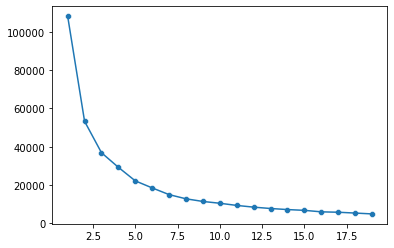

In [78]:
elbow('age','resting blood pressure')

A könyök módszer alkamazása megadja az ideális klaszterszámot. Meredeksége alapján 3 lenne az ideális, de a hozzá tartozó torzítási pontszám elég magas, ebből is és a már klaszterezés után kapott scatterplotból is az következik, hogy klaszterezésem pontatlan.

In [131]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df[['age','resting blood pressure']]);

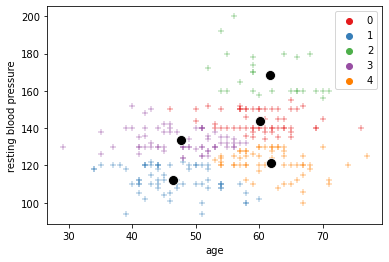

In [132]:
plot_result(kmeans,'age','resting blood pressure')

A könyök módszer alkalmazása során látjuk, hogy a torzítási pontszám kb. a felére csökken, ha a klaszterszámot 5-re állítjuk.

## B.) Regresszió

### B1.) Az előző rész eredményeit felhasználva, a megfelelő attribútumok kiválasztása és azok indoklása, a vizsgálandó regressziós feladatok megfogalmazása

A statisztika eszköztárában a lineáris regresszió egy olyan paraméteres regressziós modell, mely feltételezi a magyarázó- (X) és a magyarázott változó közti lineáris kapcsolatot. Ez azt jelenti, hogy lineáris regresszió becslése során a mintavételi adatok pontfelhőjére igyekszünk egyenest illeszteni.

In [81]:
from sklearn.linear_model import LinearRegression
import pylab

In [82]:
corr=df[features].corr()
corr;

<AxesSubplot:>

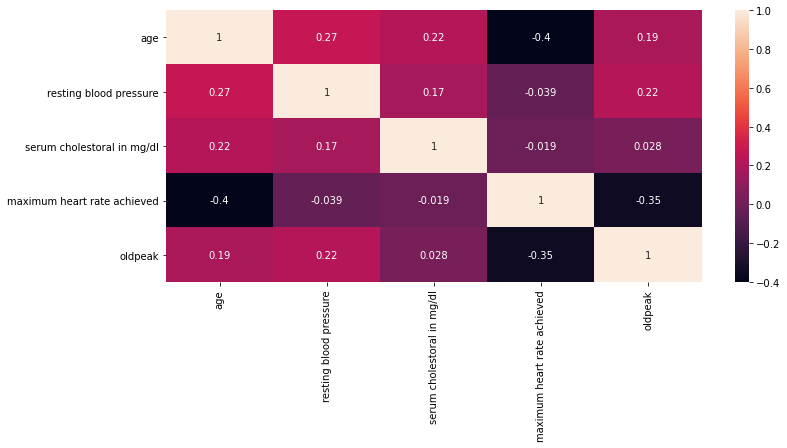

In [83]:
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(corr,annot=True,ax=ax)


A scatterplot mátrix és a korrelációs együttható mátrix alapján választom ki a kort és a max elért pulzusszámot. Látható, hogy ezek között van a legerősebb negatív kapcsolat.

### B2.) Lineáris regresszió alkalmazása folytonos attribútum esetén, az eredmények értelmezése, illetve azok felhasználása

In [84]:
v1='age'
v2='maximum heart rate achieved'

In [85]:
x = df[[v1]].to_numpy()
y = df[v2].to_numpy()
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

<AxesSubplot:xlabel='age', ylabel='maximum heart rate achieved'>

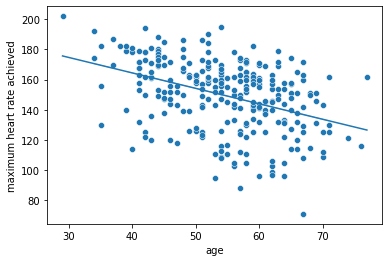

In [86]:
theta0 = reg.intercept_
theta1 = reg.coef_[0]
h = theta0 + theta1 * df[v1]
sns.scatterplot(df[v1],df[v2])
sns.lineplot(df[v1],h)

In [87]:
m = y.shape[0]
error = np.sum((h-y)**2)/(2*m)
error

224.0832738043976

In [88]:
df['x2'] = df[v1]**2
df['x3'] = df[v1]**3

In [89]:
X = df[[v1,'x2','x3']].to_numpy()
y = df[v2].to_numpy()

In [90]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression()

<AxesSubplot:xlabel='age', ylabel='maximum heart rate achieved'>

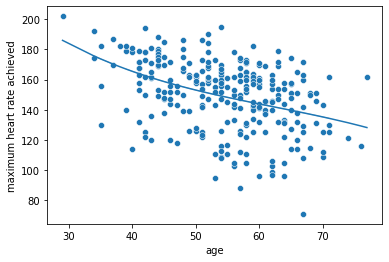

In [91]:
theta0 = reg2.intercept_
theta1 = reg2.coef_[0]
theta2 = reg2.coef_[1]
theta3 = reg2.coef_[2]
h = theta0 + theta1 * df[v1] + theta2 * df['x2'] + theta3 * df['x3']
sns.scatterplot(df[v1],df[v2])
sns.lineplot(df[v1],h)

In [92]:
m = y.shape[0]
error2 = np.sum((h-y)**2)/(2*m)
error2

223.32439464180848

In [93]:
error/error2

1.003398102405276

### B3.) Logisztikus regresszió alkalmazása diszkrét attribútum esetén, az eredmények értelmezése, illetve azok felhasználása

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
features = ['age', 'resting blood pressure','serum cholestoral in mg/dl',
            'maximum heart rate achieved','oldpeak','heart disease']

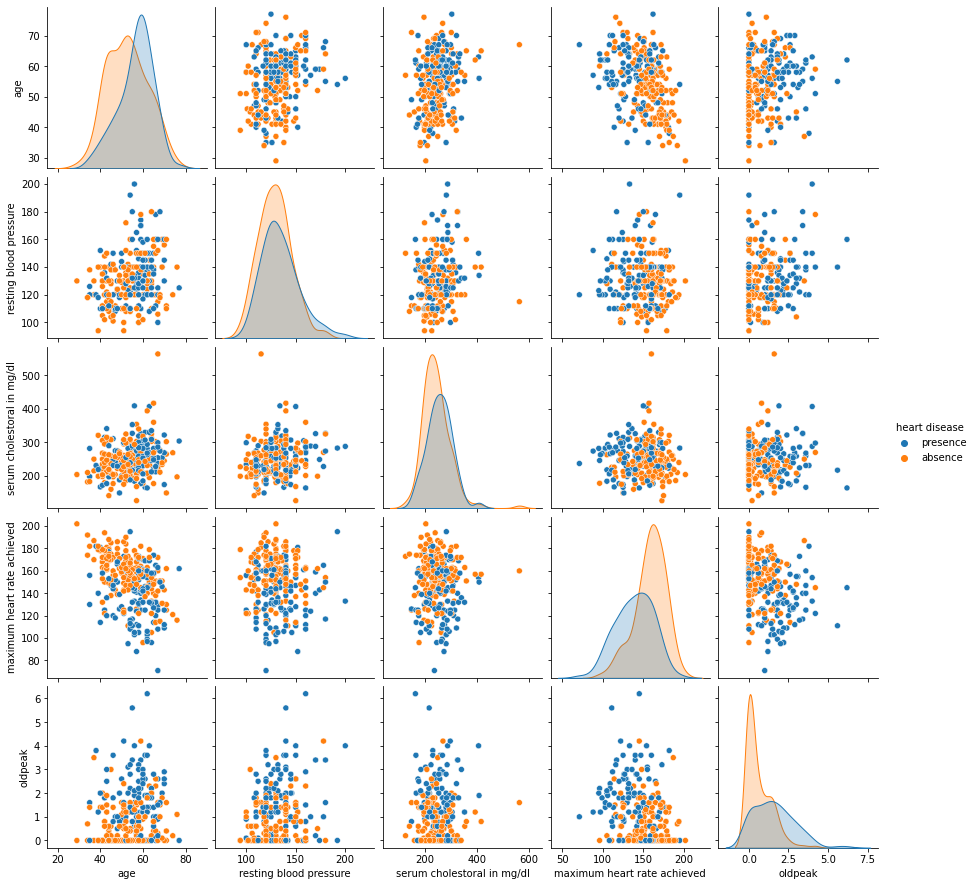

In [96]:
sns.pairplot(data=df[features],hue= 'heart disease');

In [97]:
v1='oldpeak'
v2='maximum heart rate achieved'
v3='heart disease'

A logisztikus regresszióhoz olyan ábrát kerestem ahol viszonylag jól elkülönülnek az adatok egy olyan attribútum által, amelyben csak kétféle érték szerepel. Próbálgatás után ezt a három attribútomot választottam.

<AxesSubplot:xlabel='oldpeak', ylabel='maximum heart rate achieved'>

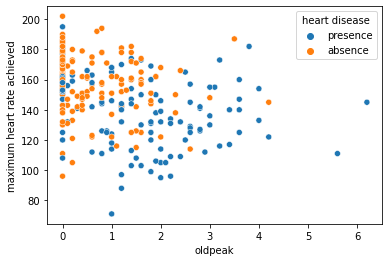

In [98]:
sns.scatterplot(df[v1],df[v2],hue=df[v3])

In [99]:
X = df[[v1,v2]].to_numpy()
y = df[v3].to_numpy()

In [100]:
reg = LogisticRegression()
reg.fit(X,y)

LogisticRegression()

<AxesSubplot:xlabel='oldpeak', ylabel='maximum heart rate achieved'>

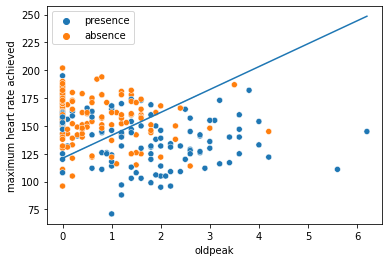

In [101]:
theta0 = reg.intercept_
theta1 = reg.coef_[0,0]
theta2 = reg.coef_[0,1]

x2 = -(theta0+theta1*df[v1])/theta2
sns.scatterplot(df[v1],df[v2],hue=df[v3])
sns.lineplot(df[v1],x2)

Látható, hogy közel sem tökéletes, vannak átfedések.

# C.) Osztályozási módszerek, gépi tanulás

## C1.) Az előző részek eredményeit felhasználva, a megfelelő attribútumok kiválasztása és azok indoklása, a vizsgálandó osztályozási feladat megfogalmazása

Osztályozás során a numerikus adatokat adjuk át az osztályozó algoritmusnak, amely az általunk választott diszkrét attribútum értékét jósolja meg azok alapján.

Diszkrét attribútumok, melyekre becslést végezhetünk: sex, chest pain type, fasting blood sugar > 120 mg/dl, resting electrocardiographic results, exercise induced angina, the slope of the peak exercise ST segment, number of major vessels colored by flourosopy, thal, heart disease

## C2.) Előfeldolgozás, pl. a kiválasztásra került attribútumok értékeinek normalizálása


Standardization (mean removal and variance scaling)

Szabványosítottam az adattáblában szereplő értékeket, ami azt jelenti, hogy minden értéket átalakítunk egy nullához közeli értékké, és az egyes attribútumok szórását egyenlő szintre hozzuk, amit a Standard Scaler az átlag eltávolításával és az egységnyi variancia méretezésével hajt végre.

Erre azért van szükség, hogy a tanuló algoritmusba minden érték ugyanakkora súllyal kerüljön be, és ne befolyásolja az eredményt az egyes attribútumok nagy arányban eltérő értékkészlete.


Az eredeti, csak numerikus értékeket tartalmazó adattáblát fogom használni, hiszen a könnyebb értelmezés kedvéért megváltoztatott adatok, most a tanulás/becslés szempontjából fontosak lehetnek. Ha kihagynám őket, akkor pontatlan becslést kapnék.

In [102]:
df_num.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [103]:
features = ['age', 'resting blood pressure','serum cholestoral in mg/dl',
            'maximum heart rate achieved','oldpeak']

<AxesSubplot:>

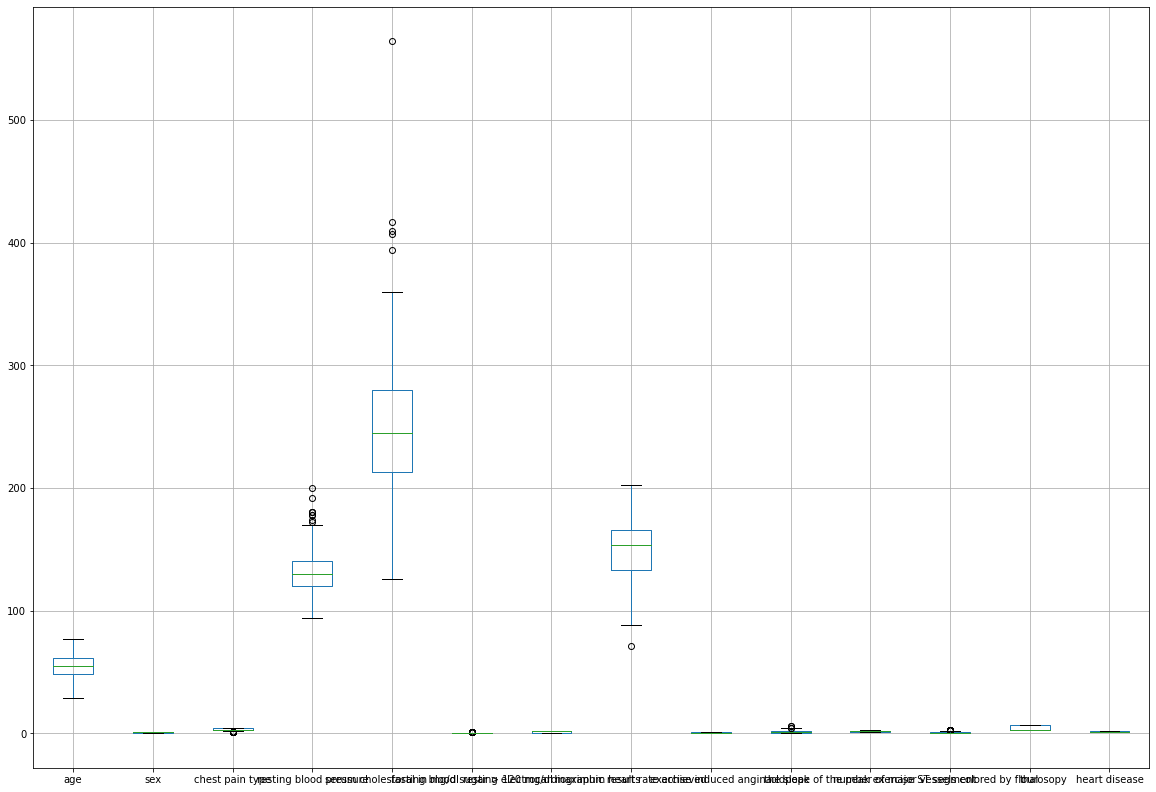

In [104]:
plt.figure(figsize=(20,14))
df_num.boxplot()

Dobozábra az összes attribútumról.

In [105]:
X = df_num

In [106]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)

StandardScaler()

In [107]:
X_norm = scaler.transform(X)
X_norm.mean(axis=0)

array([ 3.66784792e-16,  6.57909941e-18,  6.08566695e-17,  5.68269711e-16,
       -2.46716228e-16,  4.19417587e-17,  3.12507222e-17,  2.63163976e-17,
        7.89491929e-17, -5.26327952e-17, -1.06499172e-16, -6.57909941e-17,
        8.55282923e-17,  9.86864911e-17])

In [108]:
df_normalized = df_num.copy()

In [109]:
df_normalized.loc[:]= X_norm

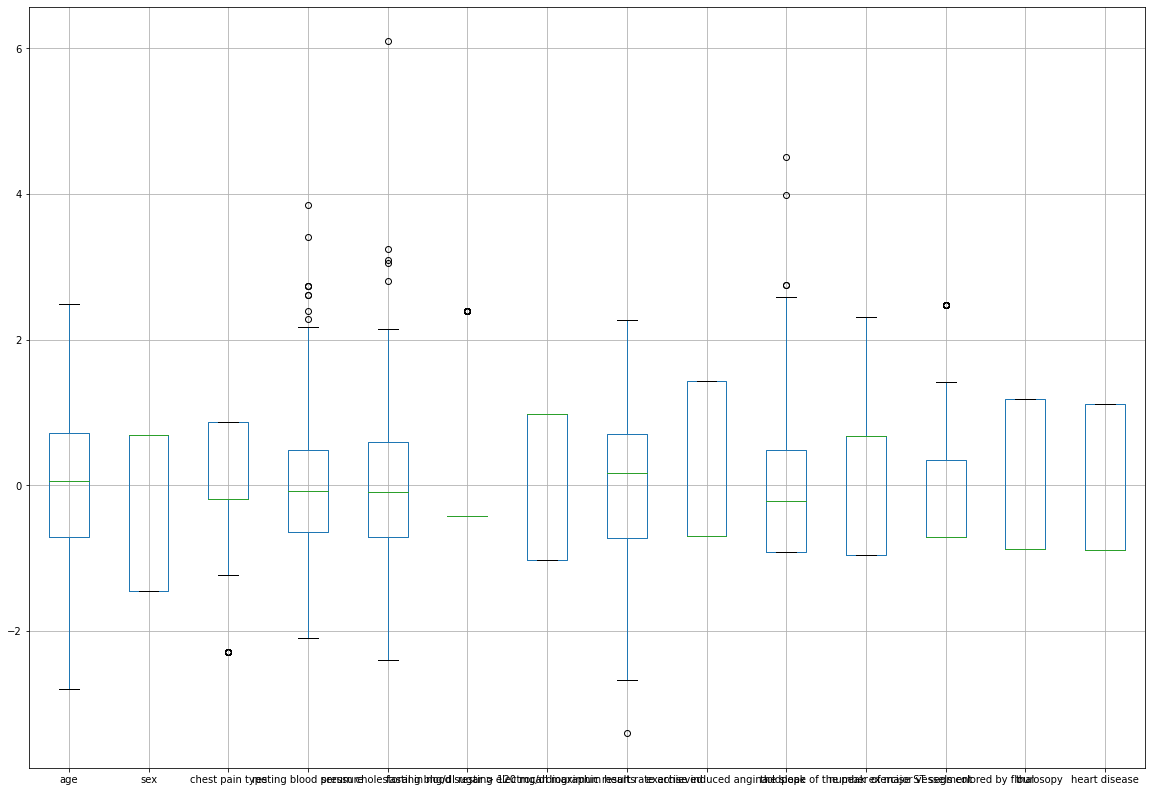

In [110]:
plt.figure(figsize=(20,14))
df_normalized.boxplot();

Látható, hogy mostmár főleg nullához közeli értékek vannak, néhol kiugró értékekkel.

In [111]:
df_normalized.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal,heart disease
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706,1.118034
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277,-0.894427
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277,1.118034
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277,-0.894427
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706,-0.894427


## C3.) A tanuló algoritmus használatához az adathalmaz tanuló és teszthalmazra történő felbontása, a választott paraméterértékek indoklása

In [112]:
def outcome(n):
    
    data=df_normalized.copy(deep=True)
    data.drop([n], axis=1,inplace=True)
    return data, df[n]

Eltávolítom a prediktálandó attribútumot.

In [113]:
X, y= outcome('heart disease')

In [114]:
X

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal
0,1.712094,0.689500,0.870928,-0.075410,1.402212,-0.417029,0.981664,-1.759208,-0.701222,1.181012,0.676419,2.472682,-0.875706
1,1.382140,-1.450327,-0.183559,-0.916759,6.093004,-0.417029,0.981664,0.446409,-0.701222,0.481153,0.676419,-0.711535,1.189277
2,0.282294,0.689500,-1.238045,-0.411950,0.219823,-0.417029,-1.026285,-0.375291,-0.701222,-0.656118,-0.954234,-0.711535,1.189277
3,1.052186,0.689500,0.870928,-0.187590,0.258589,-0.417029,-1.026285,-1.932198,1.426081,-0.743600,0.676419,0.349871,1.189277
4,2.152032,-1.450327,-1.238045,-0.636310,0.374890,-0.417029,0.981664,-1.240239,1.426081,-0.743600,-0.954234,0.349871,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,0.689500,-0.183559,2.280369,-0.981951,2.397916,-1.026285,0.532904,-0.701222,-0.481153,-0.954234,-0.711535,1.189277
266,-1.147506,0.689500,-1.238045,-0.636310,0.258589,-0.417029,-1.026285,1.008625,-0.701222,-0.918565,-0.954234,-0.711535,1.189277
267,0.172309,-1.450327,-1.238045,0.485490,0.859476,-0.417029,0.981664,0.143677,-0.701222,0.218706,0.676419,-0.711535,-0.875706
268,0.282294,0.689500,0.870928,0.485490,-1.117635,-0.417029,-1.026285,-0.072560,-0.701222,-0.568636,0.676419,-0.711535,0.673032


In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

Az attribútumot, melyre a becslést végezzük az y változó tartalmazza, melyet átadunk a train_test_split-nek a normalizált adattáblával együtt.

A train_size értéke meghatározza, milyen arányban ossza fel az adattáblát tanuló, illetve teszt részre.

A stratify megadásával biztosítjuk, hogy egyenlő arányokban ossza fel az y értékeket.

In [116]:
y_test.value_counts()/y_test.shape[0]

absence     0.555556
presence    0.444444
Name: heart disease, dtype: float64

In [117]:
y_train.value_counts()/y_train.shape[0]

absence     0.555556
presence    0.444444
Name: heart disease, dtype: float64

In [118]:
X_train.shape, y_train.shape,X_test.shape, y_test.shape

((189, 13), (189,), (81, 13), (81,))

In [119]:
X_train

,age,sex,chest pain type,resting blood pressure,serum cholestoral in mg/dl,fasting blood sugar > 120 mg/dl,resting electrocardiographic results,maximum heart rate achieved,exercise induced angina,oldpeak,the slope of the peak exercise ST segment,number of major vessels colored by flourosopy,thal
198,1.602109,-1.450327,-2.292532,0.485490,-0.206613,-0.417029,-1.026285,0.057183,-0.701222,0.656118,-0.954234,1.411276,-0.875706
170,1.602109,0.689500,-2.292532,1.607289,-0.303530,2.397916,0.981664,-0.807765,-0.701222,-0.831083,0.676419,0.349871,-0.875706
118,1.272155,-1.450327,-2.292532,1.046389,-0.458598,-0.417029,-1.026285,-1.542971,-0.701222,1.355977,2.307073,-0.711535,-0.875706
124,-0.047660,0.689500,-0.183559,-0.355860,0.452424,-0.417029,0.981664,0.100430,-0.701222,-0.481153,2.307073,0.349871,-0.875706
135,-0.927537,-1.450327,-0.183559,0.597670,-1.408386,-0.417029,0.981664,0.446409,1.426081,0.306188,2.307073,-0.711535,-0.875706
...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,0.612248,0.689500,-0.183559,0.485490,-1.253319,-0.417029,0.981664,0.230172,-0.701222,1.705907,0.676419,-0.711535,-0.875706
229,-0.267629,0.689500,-2.292532,-0.748489,-1.233935,-0.417029,0.981664,1.743831,-0.701222,-0.918565,0.676419,-0.711535,0.673032
47,-1.147506,0.689500,0.870928,-1.197209,-1.020718,-0.417029,0.981664,1.181615,-0.701222,-0.918565,-0.954234,0.349871,-0.875706
58,0.502263,-1.450327,0.870928,2.392549,-0.012779,-0.417029,-1.026285,-0.288797,1.426081,-0.918565,0.676419,-0.711535,-0.875706


## C4.) Két különböző, osztályozásra alkalmas algoritmus kiválasztása, azok rövid bemutatása, az adathalmazon elvégzett tanítás eredménye, a kapott paraméterértékek bemutatása, értelmezése

In [120]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics


def classification_model(model):

    model.fit(X_train,y_train)
    
    test_predictions = model.predict(X_test)
    train_predictions= model.predict(X_train)
    
    test_acc = metrics.accuracy_score(test_predictions,y_test)
    train_acc= metrics.accuracy_score(train_predictions,y_train)
    
    print ("Prediction accuracy of test : %s" % "{0:.3%}".format(test_acc))
    print(list(zip(test_predictions,y_test))[:10])
    
    print("\nPrediction accuracy of train : %s" % "{0:.3%}".format(train_acc))
    print(list(zip(train_predictions,y_train))[:10])
    
    

Írtam egy függvényt, mely bemenetként várja, hogy milyen algoritmust szeretnénk használni osztályozásra.

Majd a szükséges lépések után kiírja mind a test-hez, mind a train-hez tartozó predikció pontosságát, és az ezekhez tartozó becsült-valós értékpárból 10-et.

In [121]:
classification_model(LogisticRegression())

Prediction accuracy of test : 85.185%
[('presence', 'presence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('presence', 'presence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence'), ('presence', 'presence')]

Prediction accuracy of train : 87.302%
[('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence')]


A logisztikus regresszió egy olyan általánosított lineáris modell típus, amely logisztikai függvény segítségével bináris változót modellez bármilyen típusú független változó alapján.

In [122]:
model=DecisionTreeClassifier()
classification_model(model)

Prediction accuracy of test : 67.901%
[('presence', 'presence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('presence', 'absence'), ('presence', 'presence'), ('absence', 'absence'), ('absence', 'presence'), ('presence', 'presence'), ('presence', 'presence')]

Prediction accuracy of train : 100.000%
[('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence')]


A döntési fa modellje túl jól
illeszkedik a tanulóadatokra -> modell túlillesztés
Ezt pl. a fa mélységének csökkentésével vagy a levelek minimum számának növelésével ki lehet küszöbölni.

In [123]:
model=DecisionTreeClassifier(max_depth=7)
classification_model(model)

Prediction accuracy of test : 77.778%
[('presence', 'presence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('presence', 'absence'), ('presence', 'presence'), ('absence', 'absence'), ('absence', 'presence'), ('presence', 'presence'), ('presence', 'presence')]

Prediction accuracy of train : 97.884%
[('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence')]


In [124]:
model=DecisionTreeClassifier(max_depth=7,min_samples_leaf=5)
classification_model(model)

Prediction accuracy of test : 70.370%
[('absence', 'presence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('presence', 'absence'), ('presence', 'presence'), ('absence', 'absence'), ('absence', 'presence'), ('presence', 'presence'), ('presence', 'presence')]

Prediction accuracy of train : 88.889%
[('absence', 'absence'), ('absence', 'absence'), ('presence', 'absence'), ('absence', 'absence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence'), ('absence', 'absence'), ('presence', 'presence'), ('presence', 'presence')]


In [125]:
l=X.columns
featimp = pd.Series(model.feature_importances_, index=l).sort_values(ascending=False)
print (featimp)

thal                                             0.370502
maximum heart rate achieved                      0.144200
number of major vessels colored by flourosopy    0.141555
oldpeak                                          0.128253
age                                              0.100219
chest pain type                                  0.094006
resting blood pressure                           0.012657
serum cholestoral in mg/dl                       0.004608
exercise induced angina                          0.003999
the slope of the peak exercise ST segment        0.000000
resting electrocardiographic results             0.000000
fasting blood sugar > 120 mg/dl                  0.000000
sex                                              0.000000
dtype: float64


A DecisionTreeClassifier algoritmusa az egyes attribútumokhoz rendelt súly alapján megy sorrendben, és készít el egy döntési fát, melyet az alábbi ábrán lehet szemléltetni.


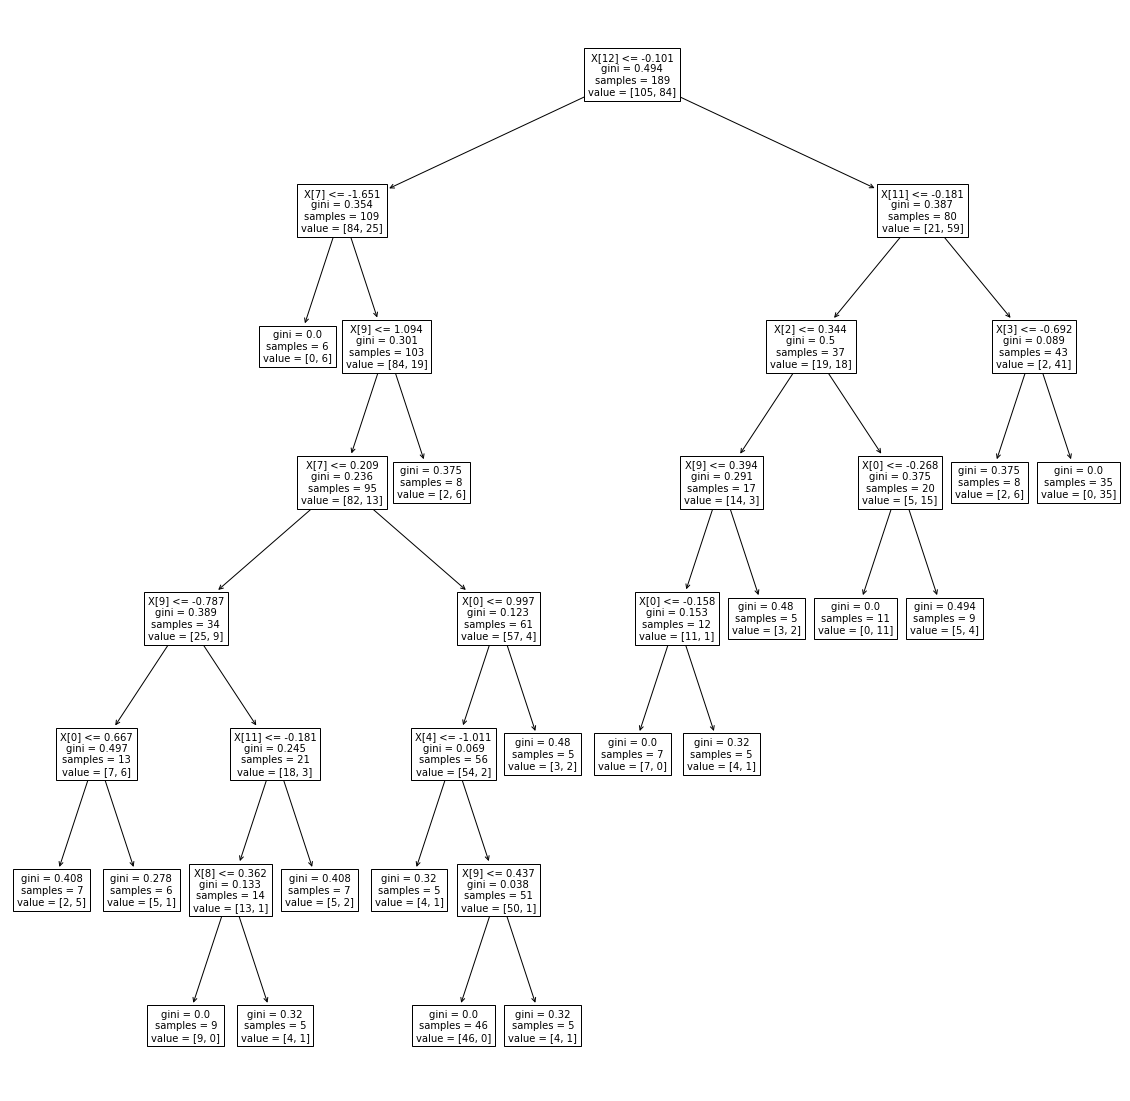

In [126]:
plt.figure(figsize=(20,20))
tree.plot_tree(model, fontsize=10)
plt.show()

Mind a két algoritmus egész pontos becslési értéket adott vissza. A döntési fa valamennyivel pontatlanabb.

### Multi-Class Classification

Ha olyan attribútumokat szeretnénk megjósolni, melyek 2 nél több értéket is felvehetnek (tehát nem binárisak).

In [127]:
X,y = outcome('chest pain type')

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [129]:
classification_model(LogisticRegression(multi_class='multinomial'))

Prediction accuracy of test : 56.790%
[(3.0, 1.0), (3.0, 2.0), (2.0, 3.0), (3.0, 3.0), (4.0, 4.0), (4.0, 3.0), (4.0, 3.0), (4.0, 4.0), (4.0, 4.0), (3.0, 1.0)]

Prediction accuracy of train : 56.085%
[(4.0, 3.0), (3.0, 3.0), (4.0, 4.0), (4.0, 4.0), (2.0, 2.0), (4.0, 4.0), (3.0, 1.0), (3.0, 4.0), (3.0, 4.0), (3.0, 3.0)]


In [130]:
model=DecisionTreeClassifier()
classification_model(model)

Prediction accuracy of test : 39.506%
[(3.0, 1.0), (2.0, 2.0), (2.0, 3.0), (4.0, 3.0), (3.0, 4.0), (4.0, 3.0), (3.0, 3.0), (4.0, 4.0), (4.0, 4.0), (4.0, 1.0)]

Prediction accuracy of train : 100.000%
[(3.0, 3.0), (3.0, 3.0), (4.0, 4.0), (4.0, 4.0), (2.0, 2.0), (4.0, 4.0), (1.0, 1.0), (4.0, 4.0), (4.0, 4.0), (3.0, 3.0)]


Multiclass osztályozás esetén sokkal pontatlanabb becsléseket kapunk.